In [1]:
#nbi:hide_in
#nbi:hide_out
#!pip3 install sklearn
#!pip3 install matplotlib 

from ipywidgets import interact, interactive, widgets
from IPython.display import display, Image
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.image as img
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [14]:
#nbi:hide_in
Label_ab = widgets.Label('Poids 300 abeilles en g')
pds_ab = widgets.FloatText()

widgets.VBox([Label_ab,pds_ab])

In [15]:
#nbi:hide_in
Label_prec = widgets.Label('Précipitation en mm')
prec = widgets.FloatText()

Label_prec1 = widgets.Label('Précipitation en mm à J-1')
prec1 = widgets.FloatText()

Label_prec2 = widgets.Label('Précipitation en mm à J-2')
prec2 = widgets.FloatText()

Label_prec3 = widgets.Label('Précipitation en mm à J-3')
prec3 = widgets.FloatText()

vbox1prec = widgets.VBox([Label_prec,prec, Label_prec1,prec1])
#vbox2 = widgets.VBox([Label_prec1,prec1])
vbox3prec = widgets.VBox([Label_prec2,prec2, Label_prec3,prec3])
#vbox4 = widgets.VBox([Label_prec3,prec3])

widgets.HBox([vbox1prec, vbox3prec])#, vbox3, vbox4])

In [16]:
#nbi:hide_in
Label_hum = widgets.Label('Humidité en %')
hum = widgets.FloatText()

Label_hum1 = widgets.Label('Humidité en % à J-1')
hum1 = widgets.FloatText()

Label_hum2 = widgets.Label('Humidité en % à J-2')
hum2 = widgets.FloatText()

Label_hum3 = widgets.Label('Humidité en % à J-3')
hum3 = widgets.FloatText()

vbox1hum = widgets.VBox([Label_hum, hum, Label_hum1, hum1])
#vbox2 = widgets.VBox([Label_prec1,prec1])
vbox3hum = widgets.VBox([Label_hum2, hum2, Label_hum3, hum3])
#vbox4 = widgets.VBox([Label_prec3,prec3])

widgets.HBox([vbox1hum, vbox3hum])#, vbox3, vbox4])

In [17]:
#nbi:hide_in
Label_temp = widgets.Label('Température moyenne en °C')
temp = widgets.FloatText()

Label_temp1 = widgets.Label('Température moyenne en °C à J-1')
temp1 = widgets.FloatText()

Label_temp2 = widgets.Label('Température moyenne en °C à J-2')
temp2 = widgets.FloatText()

Label_temp3 = widgets.Label('Température moyenne en °C à J-3')
temp3 = widgets.FloatText()

vbox1temp = widgets.VBox([Label_temp, temp, Label_temp1, temp1])
#vbox2 = widgets.VBox([Label_prec1,prec1])
vbox3temp = widgets.VBox([Label_temp2, temp2, Label_temp3, temp3])
#vbox4 = widgets.VBox([Label_prec3,prec3])

widgets.HBox([vbox1temp, vbox3temp])#, vbox3, vbox4])

In [18]:
#nbi:hide_in
saison = widgets.RadioButtons(
value = 'Printemps',
options = ['Printemps', 'Hiver (trouvée après le 01/09)'],
description = 'Saison:'
)

In [19]:
#nbi:hide_in
expo_lum = widgets.RadioButtons(
value = 'soleil',
options = ["soleil", "mi_soleil (soleil à partir de 13h-14h)", "ombre"],
description = 'Exposition à la lumière :'
)

In [20]:
#nbi:hide_in
orientation = widgets.RadioButtons(
value = 'Est',
options = ["Est",  "Ouest",  "Sud",  "Sud-Est"],
description = "Orientation de l'entrée de la ruche:"
)

In [21]:
#nbi:hide_in
vbox_ruche1 = widgets.VBox([saison,expo_lum])
vbox_ruche2 = widgets.VBox([orientation])

widgets.HBox([vbox_ruche1, vbox_ruche2])

In [25]:
#nbi:hide_in
race = widgets.RadioButtons(
value = 'Hybride',
options = ['Hybride', 'Noire'],
description = 'Race abeille :'
)

race

RadioButtons(description='Race abeille :', options=('Hybride', 'Noire'), value='Hybride')

In [44]:
#nbi:hide_in
def on_button_clicked1(b):
        with output1:
            output1.clear_output()
            
            dic_race = {'Hybride' : 0, 'Noire' : 1}
            dic_orientation = {"Est" : 0,  "Ouest" : 1,  "Sud" : 2,  "Sud-Est" : 3}
            dic_expo_lum = {"soleil" : 2, "mi_soleil (soleil à partir de 15h)" : 0, "ombre" : 1}
            dic_saison = {'Printemps' : 1, 'Hiver (trouvée après le 01/09)' : 0}
            
            
            name_column = ["pdsab_calc", "saison_exp", "expo_lum", "orientation", "race", "precipitation", 
                           "humidite", "moy_temp", "precipitation_J1", "precipitation_J2", "precipitation_J3", "humidite_J1", 
                           "humidite_J2", "humidite_J3", "moy_temp_J1", "moy_temp_J2", "moy_temp_J3"]
            
            list_pred = [[pds_ab.value * 10/3, dic_saison[saison.value], dic_expo_lum[expo_lum.value],  
                         dic_orientation[orientation.value], dic_race[race.value], prec.value, hum.value, 
                         temp.value, prec1.value, prec2.value, prec3.value, hum1.value, hum2.value, hum3.value, temp1.value, temp2.value, 
                         temp3.value]]
            
            
            pred = pd.DataFrame(list_pred, columns = name_column)
            
            
            df = pd.read_csv("info_tot_ab.csv",sep=";", decimal = ",")
            df['date'] = pd.to_datetime(df["date"])
            df.dropna(inplace=True)
            values=["semaine1", "semaine2", "semaine3", "semaine4"]
            filtered_df = df[df.semaine.isin(values)]
                        
            y = filtered_df["num_jour"]
            X = filtered_df.copy()

            col_sup = ["num_jour", "semaine", "site_lot_nbab", "date", "nbab" ,"cadre", "cause_mort", "origine", "lot", 
                       "site", "Departement", "Region", "meteo_km", "alt_site_m", "alt_meteo_m", "somme_precipitation_3",
                       "somme_precipitation_7", "temp_12h", "expo_vent", "type"]

            for e in col_sup :
                del X[e]
            
            col_categorie = ["saison_exp", "expo_lum", "orientation", "race"]

            for e in col_categorie :
                X[e] = pd.Categorical(X[e]).codes
            
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
            df = RandomForestClassifier()
            df.fit(X_train, y_train)
            y_predict = df.predict(X_test)
            acc = accuracy_score(y_test,y_predict)

            for i in range(20): 
                Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size=0.33, random_state=0)
                dfs = RandomForestClassifier()
                dfs.fit(Xs_train, ys_train)
                ys_predict = dfs.predict(Xs_test)
                accs = accuracy_score(ys_test,ys_predict)

                if accs > acc : 
                    X_train, X_test, y_train, y_test = Xs_train, Xs_test, ys_train, ys_test
                    df = dfs
                    y_predict = ys_predict
                    acc = accs
                    
            
            print("Les abeilles sont mortes il y a environ", df.predict(pred)[0], "jours avec une fiabilité de", 
                  str(accuracy_score(y_test,y_predict)*100)[0:5], "%")

            
            display(Image(filename='Courbe_ML.png'))

Button(button_style='success', description='Prédiction', style=ButtonStyle())

Output()

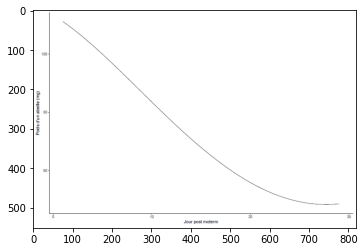

In [45]:
#nbi:hide_in
button1 = widgets.Button(description="Prédiction", button_style='success') # 'success', 'info', 'warning', 'danger' or '')
output1 = widgets.Output()
display(button1, output1)

button1.on_click(on_button_clicked1)